# Objective:

I am using an educational dataset to see learner's activities and their impact on academic performance.The features are classified into three major categories: 

(1) Demographic features such as gender and nationality.

(2) Academic background features such as educational stage, grade Level and section. 

(3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.
  
  
 
Target:

The students are classified into three numerical intervals based on their total grade/mark:

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.



# 1.Data

Import libraries

Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
% matplotlib inline

In [2]:
train_df= pd.read_csv('/Users/meenajoshi/Desktop/xAPI-Edu-Data.csv')
train_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# 2. Data Exploration

Statistical summary

Univariate distribution

Bivariate Distribution

Acessing patterns


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [4]:
train_df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


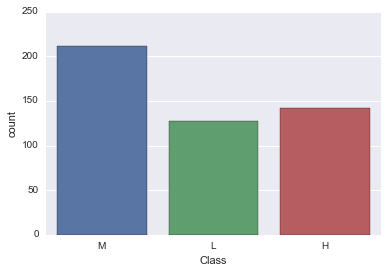

In [5]:
sns.countplot(train_df['Class'])

# Demographic features

Gender- student's gender (nominal: 'Male' or 'Female’)

Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

Parent responsible for student (nominal:’mom’,’father’)
                    

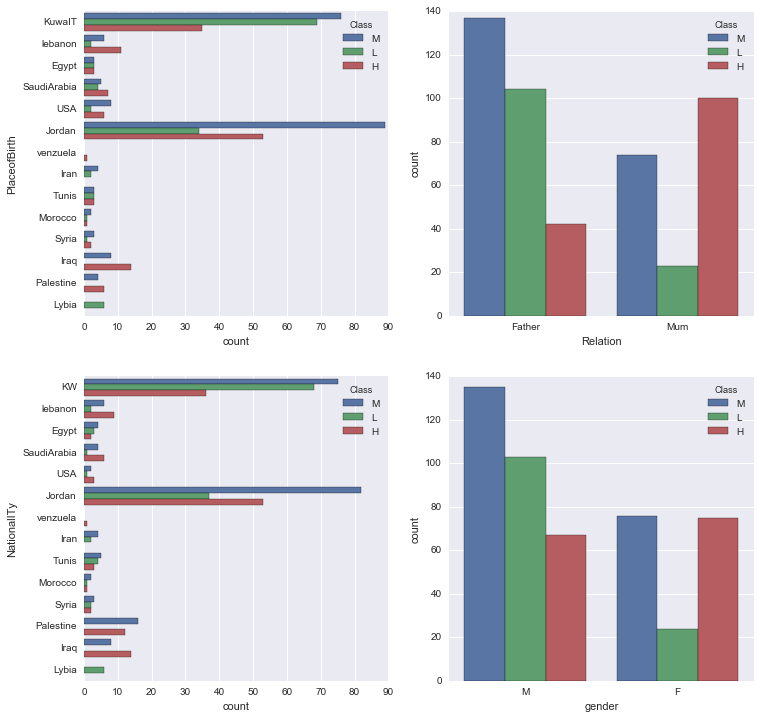

In [6]:
plt.figure(figsize= (12,12))
plt.subplot(2,2,1)
sns.countplot(y=train_df['PlaceofBirth'], hue = train_df['Class'])
plt.subplot(2,2,2)
sns.countplot(train_df['Relation'],hue=train_df['Class'])
plt.subplot(2,2,3)
sns.countplot(y=train_df['NationalITy'], hue = train_df['Class'])
plt.subplot(2,2,4)
sns.countplot(train_df['gender'], hue=train_df['Class'])

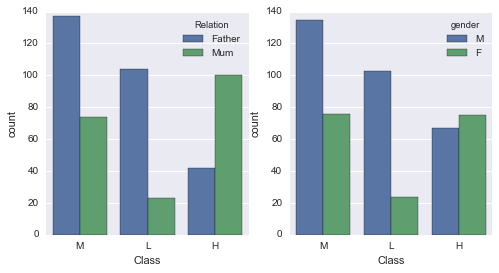

In [13]:
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
sns.countplot(train_df['Class'], hue = train_df['Relation'])
plt.subplot(1,2,2)
sns.countplot(train_df['Class'],hue = train_df['gender'])
plt.show()

More students have Father as a responsible parent but the students whose mothers were responsible for them had a higher chance of performing well.

There are more male students here. The relative performance of female students is way better then the males. Bars for each class also confirms the better performance of females.

Place of birth and Nationality features are correlated to a good extent. The number of students from different nationality and birth place varies a lot. These features are not very promising in predicting target.


# Academic background features

StageID- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

GradeID- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)  

SectionID- classroom student belongs (nominal:’A’,’B’,’C’)

Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’) 

Semester- school year semester (nominal:’ First’,’ Second’)
 

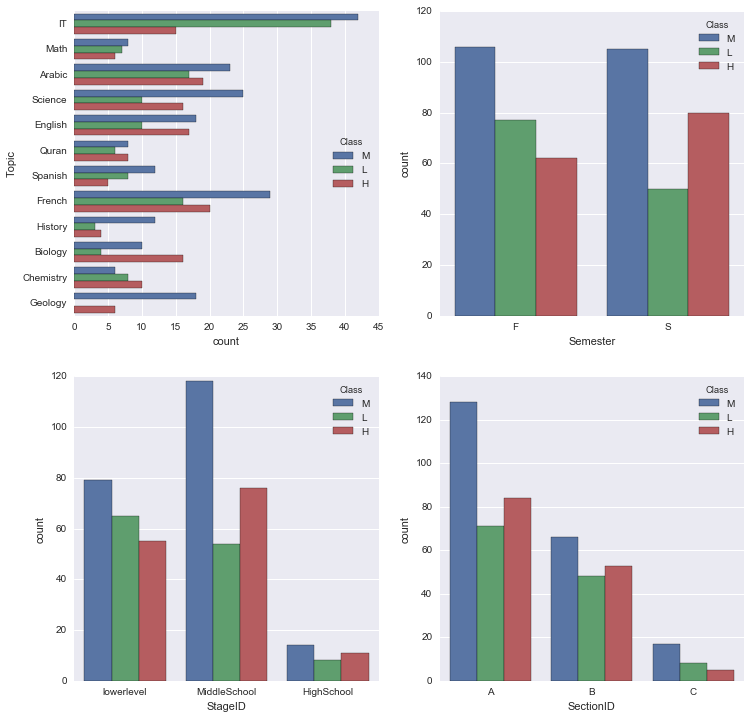

In [14]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(y= train_df['Topic'], hue = train_df['Class'])
plt.subplot(2,2,2)
sns.countplot(train_df['Semester'],hue=train_df['Class'])
plt.subplot(2,2,3)
sns.countplot(train_df['StageID'],hue=train_df['Class'])
plt.subplot(2,2,4)
sns.countplot(train_df['SectionID'],hue=train_df['Class'])
plt.show()

It looks like students's performed a bit better in the second semester ('S') than in the first semester ('F'). It looks like female students performed better than males on average. Would the amount of visited resources in the online environment influence the final grade?

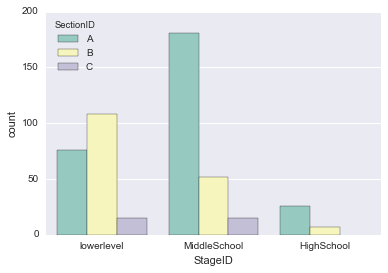

In [15]:
sns.countplot(train_df['StageID'],hue=train_df['SectionID'],palette="Set3")

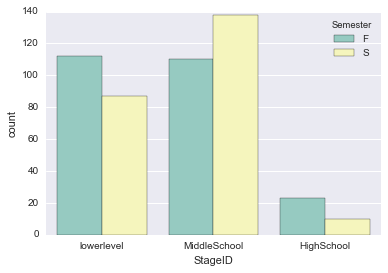

In [16]:
sns.countplot(train_df['StageID'],hue=train_df['Semester'],palette="Set3")

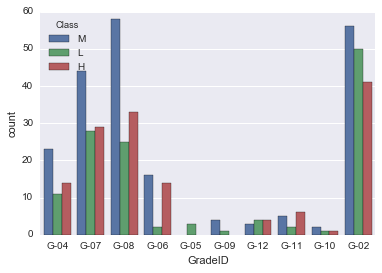

In [17]:
sns.countplot(train_df['GradeID'], hue= train_df['Class'])

In [18]:
train_df['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

# Behavioral features

raisedhands- how many times the student raises his/her hand on classroom (numeric:0-100)

VisITedResources- how many times the student visits a course content(numeric:0-100)  

AnnouncementsView- how many times the student checks the new announcements(numeric:0-100)

Discussion- how many times the student participate on discussion groups (numeric:0-100)

ParentAnsweringSurvey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

ParentschoolSatisfaction- the degree of parent's satisfaction from school(nominal:’Yes’,’No’)

StudentAbsenceDays- the number of absence days for each student (nominal: above-7, under-7)
         

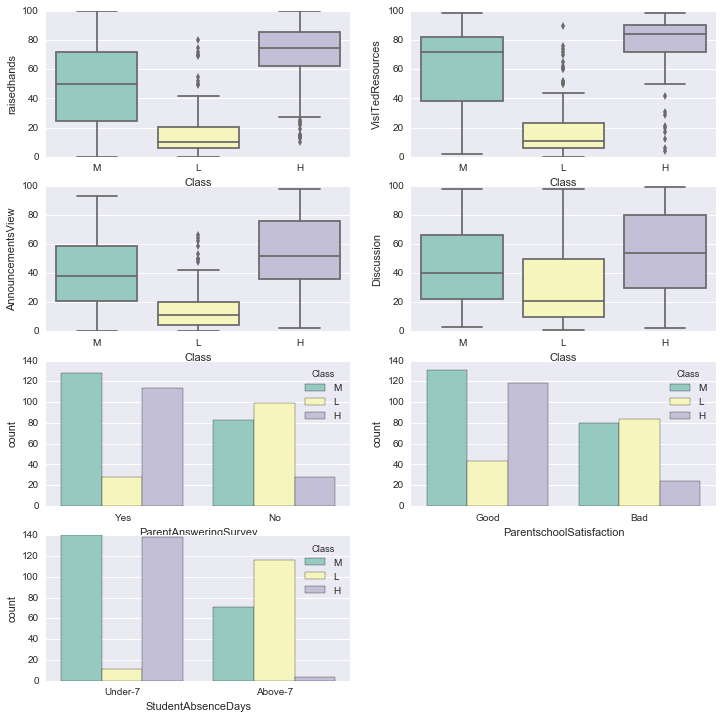

In [19]:
plt.figure(figsize= (12,12))
plt.subplot(4,2,1)
sns.boxplot(train_df['Class'], train_df['raisedhands'],palette="Set3" )
plt.subplot(4,2,2)
sns.boxplot(train_df['Class'],train_df['VisITedResources'],palette="Set3")
plt.subplot(4,2,3)
sns.boxplot(train_df['Class'],train_df['AnnouncementsView'],palette="Set3")
plt.subplot(4,2,4)
sns.boxplot(train_df['Class'],train_df['Discussion'],palette="Set3")
plt.subplot(4,2,5)
sns.countplot(train_df['ParentAnsweringSurvey'], hue= train_df['Class'],palette="Set3")
plt.subplot(4,2,6)
sns.countplot(train_df['ParentschoolSatisfaction'], hue= train_df['Class'],palette="Set3")
plt.subplot(4,2,7)
sns.countplot(train_df['StudentAbsenceDays'], hue= train_df['Class'],palette="Set3")
plt.show()

From the students who did well, a large majority of their parents were satisfied with the education they received. The students whose parents were least satisfied with the school performed much worse. Parent's participation in surveys shows the same trend.

The biggest visual trend can be seen in how frequently the student was absent. Over 90% of the students who did poorly were absent more than seven times, while almost none of the students who did well were absent more than seven times.

Although parent satisfaction showed a huge pattern with respect to how well a student did in the class, there is no information on whether or not the survey was taken after grades were posted, and furthermore the attribute does not give any information about the student's classroom behavior. 

The boxplot analysis indicates that those who did well were more active in class, and the worst performers were the least active. Students who received a lower grade (L) visited way fever resources than students that scored a M or H grade. Same trend is seen in Announcement views, raised hands and discussions as well. Additionally, women who received a high mark (H) almost exclusively visited a lot of the online resources.

Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction seems to be very important features in driving academic performances.

# 3. Data Preprocessing


Visualizations of the data has revealed some interesting insights. Now we will do encoding of our categorical variables and use Machine learning. We will split the data into a train and test set.  

In [20]:
X= train_df.drop(['Class'], axis=1)
y= train_df['Class']

In [21]:
# Encoding our categorical columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Cat_col =  X.dtypes.pipe(lambda X: X[X=='object']).index
for col in Cat_col:
    X[col] = le.fit_transform(X[col])
    

In [22]:
Cat_col

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays'],
      dtype='object')

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Using Tree-based Models:

We will use Logistic Regression as baseline, and explore tree-based methods. We will compare tree-based machine learning models and explore how parameter tuning influences the accuracy of the models.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cross_validation import cross_val_score
#from xgboost import XGBClassifier, plot_importance

In [25]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)}

for k,v in models.items():
    v.fit(X_train, y_train)
    pred = v.predict(X_test)
    print('Results for {}'.format(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print('Accuracy is {}'.format(acc))
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

Results for Logistic Regression

[[14  0  8]
 [ 0 26  0]
 [11  6 31]]
             precision    recall  f1-score   support

          H       0.56      0.64      0.60        22
          L       0.81      1.00      0.90        26
          M       0.79      0.65      0.71        48

avg / total       0.75      0.74      0.74        96

Accuracy is 0.7395833333333334



Results for Random Forest

[[17  0  5]
 [ 0 25  1]
 [ 5  3 40]]
             precision    recall  f1-score   support

          H       0.77      0.77      0.77        22
          L       0.89      0.96      0.93        26
          M       0.87      0.83      0.85        48

avg / total       0.85      0.85      0.85        96

Accuracy is 0.8541666666666666



Results for Decision Tree

[[17  0  5]
 [ 0 23  3]
 [ 7  5 36]]
             precision    recall  f1-score   support

          H       0.71      0.77      0.74        22
          L       0.82      0.88      0.85        26
          M       0.82      0.75      

# Random Forest

The Random Forest Classifier performed best out of tried models.We will try to see the affect of parameter tuning in random forest classifier. Few parameters to consider:

1. n_estimators- the number of trees the algorithm builds before taking averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

2. max_features- which is the maximum number of features Random Forest is allowed to try in an individual tree.

3. min_sample_leaf- the minimum number of samples required to be at a leaf node. .

4. max_depth- the maximum depth of the tree.


Let's explore the number of estimators in the forest further. 

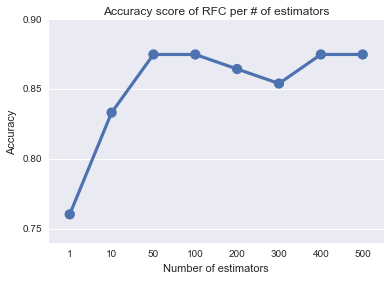

In [26]:
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rf1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred_rf1 = rf1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred_rf1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

And indeed, the RFC performs better when the number of estimators increases. However, it plateaus at 50 estimators. In the for loop before I used 100 estimators. Apparently 50 estimators is enough for this dataset. If we start experimenting on a very large dataset, having less estimators will save us a lot of running time.

We can also explore another variable like the minimum number of samples required to be at a leaf node.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


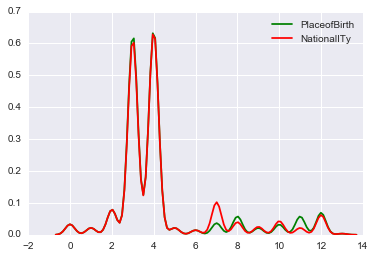

In [27]:
g1= sns.kdeplot(X['PlaceofBirth'], color='g')
g2= sns.kdeplot(X['NationalITy'], color='r')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


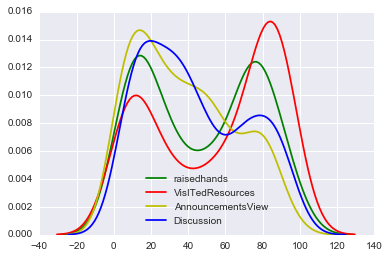

In [28]:
g1 = sns.kdeplot(X['raisedhands'], color='g')
g1 = sns.kdeplot(X['VisITedResources'],color='r')
g1 = sns.kdeplot(X['AnnouncementsView'], color='y')
g1 = sns.kdeplot(X['Discussion'], color='b')
plt.show()

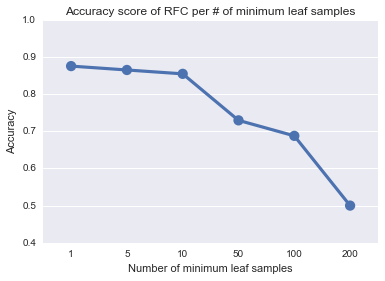

In [29]:
# Exploring minimum leaf samples
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for l in leaf_options:
    rf2 = RandomForestClassifier(n_estimators=50, random_state=52, min_samples_leaf=l)
    pred_rf2 = rf2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred_rf2)
    score.append(accuracy)
    leaf.append(l)
plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')
plt.show()

In this case we see that the accuracy score simply decreases as the minimum leaf samples increase. Therefore, it is best to keep this value at the default of 1.

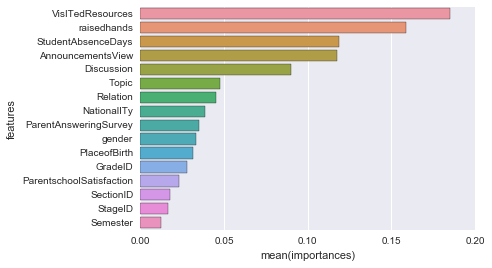

In [30]:
rfc = RandomForestClassifier(n_estimators=50, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
df=pd.DataFrame({'features': X.columns, 'importances':rfc.feature_importances_})
df= df.sort_values(by='importances', ascending= False)
sns.barplot(x='importances', y= 'features', data= df)

Visited resources is the most important feature in the RFC model. Behavioural features seems to be most important. 